In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [40]:
df = pd.read_csv("sample2_malicious_url.csv")
# df.head()

In [41]:
features = [x for x in df.columns if x != 'type']  # Exclude 'type' column
print(len(features))

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['type'])

X_train, X_test, y_train, y_test = train_test_split(df[features], y, test_size=0.3,random_state=109)

8


In [42]:
# Create a svm classfier
clf = svm.SVC(kernel='linear')

# Train the model using training set
clf.fit(X_train, y_train)

# Predict the response of dataset
y_pred = clf.predict(X_test)

In [43]:
def plot_svm_decision_boundary(clf, X, y, title="SVM Desicion Boundary"):

    if X.shape[1] != 2:
        raise ValueError("This function only works on 2D data")
    
    # Create a mesh to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict on the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

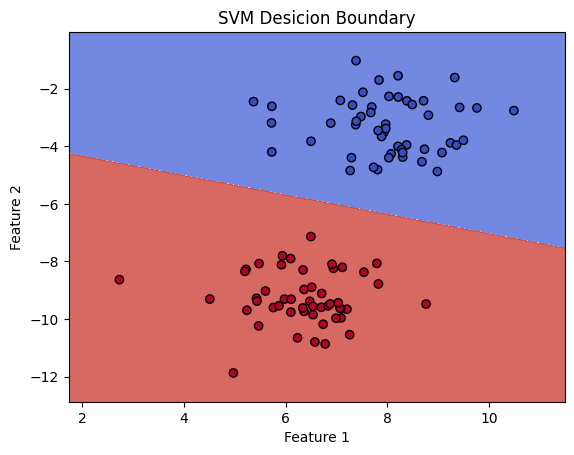

In [44]:
# Create Sample Data
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# Train SVM Model 
clf = svm.SVC(kernel='linear')
clf.fit(X,y)

# Plot decision Boundary
plot_svm_decision_boundary(clf, X,y)

In [45]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9173333333333333


In [46]:
# Precision and Recall for multiclass classification

print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))

Precision: 0.8987836549438665
Recall: 0.9173333333333333


C:\Users\nurde\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
